# <center>IMPORTS</center> 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from datetime import datetime

In [2]:
# Load the data
df=pd.read_csv('Data/preprocessed_data.csv')

In [3]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['date_']=pd.to_datetime(df['date_'])

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-12-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or sp

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date,date_,hour,minute
0,1970-01-01 00:00:01.514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2017-12-31 18:01:00,2017-12-31,18,1
1,1970-01-01 00:00:01.514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2017-12-31 18:01:00,2017-12-31,18,1
2,1970-01-01 00:00:01.514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2017-12-31 18:01:00,2017-12-31,18,1
3,1970-01-01 00:00:01.514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2017-12-31 18:01:00,2017-12-31,18,1
4,1970-01-01 00:00:01.514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2017-12-31 18:01:00,2017-12-31,18,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486465 entries, 0 to 23486464
Data columns (total 14 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   Asset_ID   int64         
 2   Count      float64       
 3   Open       float64       
 4   High       float64       
 5   Low        float64       
 6   Close      float64       
 7   Volume     float64       
 8   VWAP       float64       
 9   Target     float64       
 10  date       object        
 11  date_      datetime64[ns]
 12  hour       int64         
 13  minute     int64         
dtypes: datetime64[ns](2), float64(8), int64(3), object(1)
memory usage: 2.4+ GB


In [8]:
null_asset_0=len(df[df['Asset_ID']==0]['date_'].unique())

1359

In [9]:
# Set the index of the DataFrame to the 'timestamp' column
df.set_index('date_', inplace=True)

In [10]:
df=df.drop(columns=['minute'])

In [11]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date,hour
date_,,,,,,,,,,,,
2017-12-31,1970-01-01 00:00:01.514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2017-12-31 18:01:00,18
2017-12-31,1970-01-01 00:00:01.514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2017-12-31 18:01:00,18
2017-12-31,1970-01-01 00:00:01.514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2017-12-31 18:01:00,18
2017-12-31,1970-01-01 00:00:01.514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2017-12-31 18:01:00,18
2017-12-31,1970-01-01 00:00:01.514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2017-12-31 18:01:00,18


In [12]:
df.tail()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,date,hour
date_,,,,,,,,,,,,
2021-09-20,1970-01-01 00:00:01.632181440,9,163.0,156.502000,156.620000,156.000000,156.075667,7.381963e+02,156.260253,-0.001154,2021-09-20 18:44:00,18
2021-09-20,1970-01-01 00:00:01.632181440,10,23.0,2420.146667,2421.000000,2412.779000,2414.069667,1.315794e+00,2417.326038,0.009831,2021-09-20 18:44:00,18
2021-09-20,1970-01-01 00:00:01.632181440,13,512.0,0.090989,0.091133,0.090831,0.090885,1.900695e+06,0.090943,0.004163,2021-09-20 18:44:00,18
2021-09-20,1970-01-01 00:00:01.632181440,12,193.0,0.280952,0.281300,0.280175,0.280403,1.628699e+05,0.280655,0.000449,2021-09-20 18:44:00,18
2021-09-20,1970-01-01 00:00:01.632181440,11,38.0,232.075000,232.300000,231.310000,231.680000,4.914804e+01,231.794078,0.002568,2021-09-20 18:44:00,18


### Resampling the dataframes

In [13]:
df_date = df.resample('D').mean().reset_index()

In [14]:
df_date

,date_,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,hour
0,2017-12-31,4.747592,81.749133,2360.370859,2388.009780,2340.527165,2360.395524,5.444542e+02,2360.187317,1.037023e-03,20.497881
1,2018-01-01,4.948897,97.577975,2315.568613,2343.948592,2298.394107,2315.563602,5.102811e+02,2315.475839,2.788284e-04,11.637847
2,2018-01-02,4.922088,221.818116,1547.304295,1568.245413,1527.065056,1547.115109,1.940355e+03,1547.119146,-1.150598e-03,11.575036
3,2018-01-03,5.163945,92.532139,1694.953503,1698.691875,1691.191322,1695.008637,4.881645e+03,1694.973435,1.607534e-04,11.750351
4,2018-01-04,5.660965,114.016358,959.898241,962.306505,957.091572,959.895035,1.572246e+04,959.879853,-1.617869e-04,11.402225
...,...,...,...,...,...,...,...,...,...,...,...
1435,2021-12-05,6.500000,2120.915774,4785.561731,4798.207029,4772.507381,4785.140056,1.133027e+06,4785.090261,3.960556e-05,11.500000
1436,2021-12-06,6.497220,427.989079,3018.300903,3021.590452,3014.992732,3018.313556,2.130610e+05,3018.280413,6.574033e-05,11.500298
1437,2021-12-07,6.474772,310.101962,2822.407235,2824.449200,2819.674038,2822.330726,1.585018e+05,2822.300695,-6.984176e-05,11.489038
1438,2021-12-08,6.496723,665.568222,3757.396626,3761.093932,3753.333389,3757.376712,4.849365e+05,3757.250700,-5.546214e-05,11.489921


In [15]:
unique_dates=len(list(date_.unique()))
unique_dates

1440

### Creating different dataframes for 14 assets

In [4]:
df_dict={}
for i in df['Asset_ID'].unique():
    filtered_df=df[df['Asset_ID']==i].resample('D').mean().reset_index()
    df_dict[f'df_{i}']=filtered_df.dropna()

NameError: name 'df' is not defined

In [28]:
df_dict.keys()

dict_keys(['df_2', 'df_0', 'df_1', 'df_5', 'df_7', 'df_6', 'df_9', 'df_11', 'df_13', 'df_12', 'df_3', 'df_8', 'df_10', 'df_4'])

In [29]:
df_dict['df_2'].head()

,date_,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,hour
0,2017-12-31,2.0,43.376045,2350.171351,2371.748245,2332.026964,2350.056096,17.233684,2349.893225,-0.000132,20.506964
1,2018-01-01,2.0,54.504167,2345.836356,2363.048056,2331.101035,2345.723964,21.956517,2345.637128,-0.000135,11.500000
2,2018-01-02,2.0,82.604167,1297.130513,1315.645583,1281.358972,1297.006718,74.905032,1296.942744,-0.000536,11.500000
3,2018-01-03,2.0,34.275574,1274.979515,1278.167864,1271.473222,1275.020752,36.872431,1275.011343,0.000179,11.501044
4,2018-01-04,2.0,38.129167,652.065020,654.003472,650.204097,652.058904,65.186963,652.046918,-0.000361,11.500000


In [30]:
for i in range(14):
    print("df_{0}{1}".format(i,df_dict[f'df_{i}'].shape))

df_0(1359, 11)
df_1(1360, 11)
df_2(1360, 11)
df_3(1253, 11)
df_4(893, 11)
df_5(1360, 11)
df_6(1360, 11)
df_7(1360, 11)
df_8(1231, 11)
df_9(1360, 11)
df_10(619, 11)
df_11(1360, 11)
df_12(1313, 11)
df_13(1323, 11)


In [31]:
df_dict['df_0'].shape[0]-null_asset_0

0

In [32]:
df_dict['df_0'].isnull().sum()

date_       0
Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
hour        0
dtype: int64

In [33]:
for key,data in df_dict.items():
    #data=data.dropna()
    filename=key+".csv"
    data.to_csv(filename,index=False)

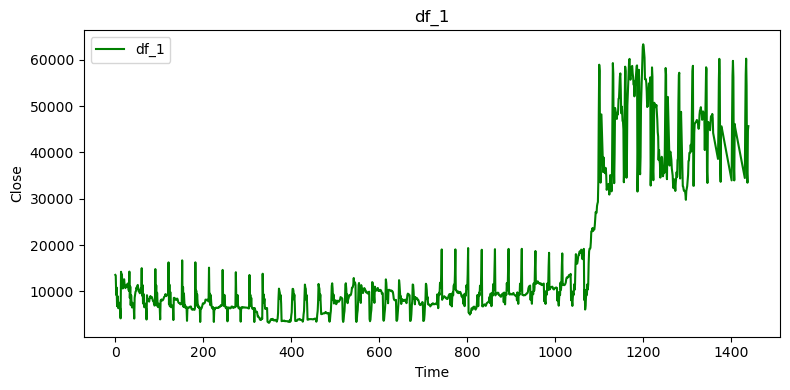

In [342]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(8,4))

# fill missing values 
ax = f.add_subplot(1,1,1)
plt.plot(df_dict['df_1'][['Close']], label='df_1', color='g')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Close')
plt.title('df_1')
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

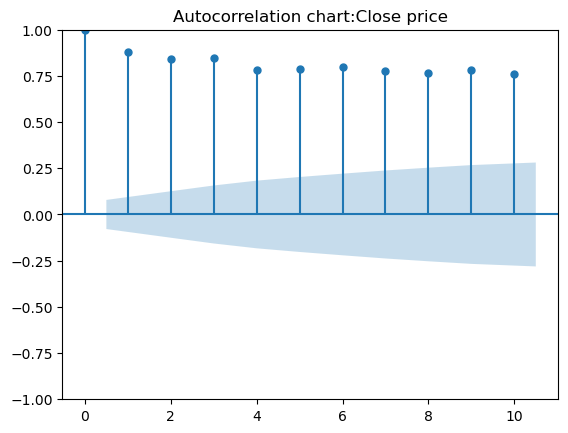

In [351]:
# # Autocorrelation of Closing price of Oracle
plot_acf(df_dict['df_10'][["Close"]],lags=10,title="Autocorrelation chart:Close price")
plt.show()

In [26]:
#conda install -c conda-forge prophet

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\LENOVO\anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.11.2               |     pyhd3eb1b0_0         1.3 MB
    cftime-1.6.2               |   py39h080aedc_0         183 KB
    convertdate-2.4.0          |     pyhd8ed1ab_0          38 KB  conda-forge
    ephem-4.1.2                |   py39h2bbff1b_0         1.3 MB
    hdf4-4.2.13                |       h712560f_2         1.3 MB
    hijri-converter-2.2.4      |     pyhd8ed1ab_0          18 KB  conda-forge
    holidays-0.23              |     pyhd8ed1ab_0         196 KB  conda-forge
    korean_lunar_calendar-0.3.1|     pyhd8ed1ab_0          12 KB  conda-forge
    libnetcdf-4.8.1            |       h6685c40_1         590 KB
    libpython-2.2              |   py39hcbf5309_2          52 KB  



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [34]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [36]:
df_dict['df_0'].head()

,date_,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,hour
0,2017-12-31,0.0,13.132565,8.378154,8.388847,8.365258,8.376281,481.024352,8.375323,0.000173,20.510086
1,2018-01-01,0.0,15.528148,8.285865,8.296446,8.272346,8.283114,593.230637,8.283318,-0.000246,11.510370
2,2018-01-02,0.0,54.082811,9.546879,9.569352,9.521549,9.545497,1709.655338,9.543690,-0.002671,11.521921
3,2018-01-03,0.0,28.030556,10.502316,10.511793,10.492931,10.502147,912.104028,10.501783,-0.000062,11.500000
4,2018-01-04,0.0,58.917361,10.942258,10.957537,10.924012,10.942255,2947.915542,10.940911,0.000181,11.500000


In [108]:
ds=df_dict['df_1'].date_
y=df_dict['df_1'].Close

In [109]:
simple_df=pd.DataFrame(columns=['ds','y'])

In [110]:
simple_df['ds']=ds
simple_df['y']=y

In [111]:
simple_df.head()

,ds,y
0,2017-12-31,13544.244658
1,2018-01-01,13423.176464
2,2018-01-02,9238.955910
3,2018-01-03,10820.345749
4,2018-01-04,6788.420685


In [148]:
m = Prophet()
m.fit(simple_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [149]:
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-31,6052.286250,742.189080,15335.300907,6052.286250,6052.286250,2119.333463,2119.333463,2119.333463,202.187163,202.187163,202.187163,1917.146300,1917.146300,1917.146300,0.0,0.0,0.0,8171.619712
1,2018-01-01,6057.006029,975.211895,15399.390155,6057.006029,6057.006029,2171.915276,2171.915276,2171.915276,-164.199234,-164.199234,-164.199234,2336.114511,2336.114511,2336.114511,0.0,0.0,0.0,8228.921305
2,2018-01-02,6061.725808,1012.255477,15805.537948,6061.725808,6061.725808,2621.152925,2621.152925,2621.152925,-85.244660,-85.244660,-85.244660,2706.397585,2706.397585,2706.397585,0.0,0.0,0.0,8682.878733
3,2018-01-03,6066.445587,1934.866691,16231.406523,6066.445587,6066.445587,2912.030542,2912.030542,2912.030542,-111.898205,-111.898205,-111.898205,3023.928746,3023.928746,3023.928746,0.0,0.0,0.0,8978.476129
4,2018-01-04,6071.165367,2047.307752,16735.380922,6071.165367,6071.165367,3261.117026,3261.117026,3261.117026,-24.648188,-24.648188,-24.648188,3285.765214,3285.765214,3285.765214,0.0,0.0,0.0,9332.282392


In [159]:
from sklearn.metrics import mean_squared_error
# Extract actual values
y_true = simple_df['y'].values[-365:]

# Extract predicted values
y_pred = forecast1['trend'].values[-365:]

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

print("MSE: ", mse)

MSE:  139879049.14847785


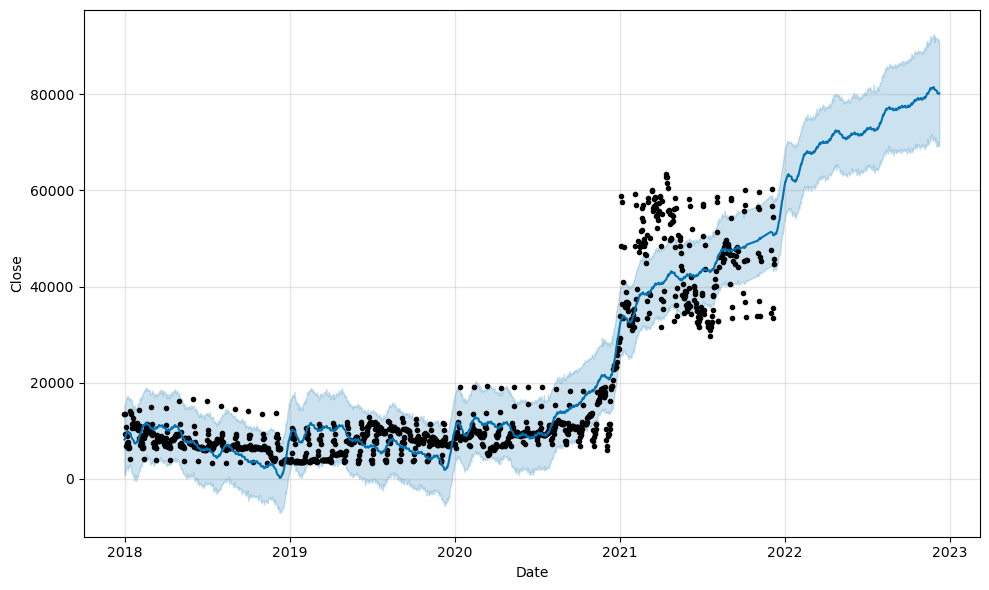

In [151]:
figure = m.plot(forcast,xlabel='Date',ylabel='Close')

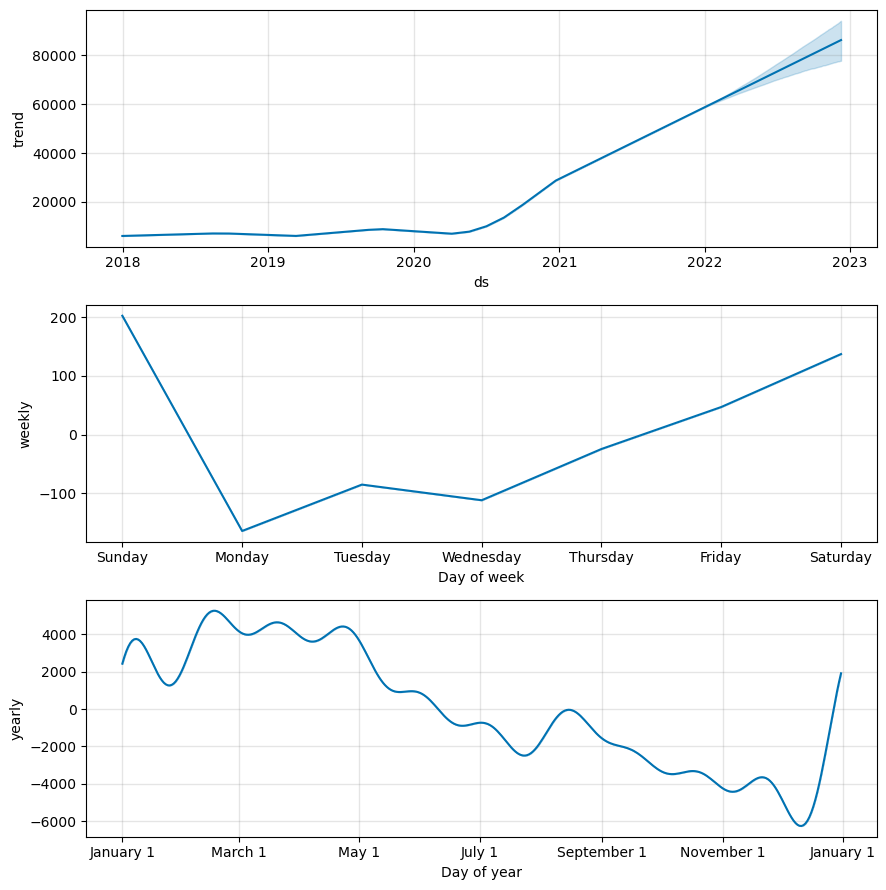

In [152]:
figure = m.plot_components(forcast)

In [153]:
future1 = m.make_future_dataframe(periods=12, freq='D')
forecast1 = m.predict(future1)

In [196]:
# Select the relevant columns from the forecast dataframe
y_true = simple_df['y'].values[-12:]
y_pred = forecast1['yhat'].values[-12:]

In [158]:
from sklearn.metrics import mean_squared_error,r2_score
r2 = r2_score(y_true, y_pred)
# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"R-squared value: {r2:.4f}")
print("MSE: ", mse)

R-squared value: -0.7272
MSE:  132656119.71767175


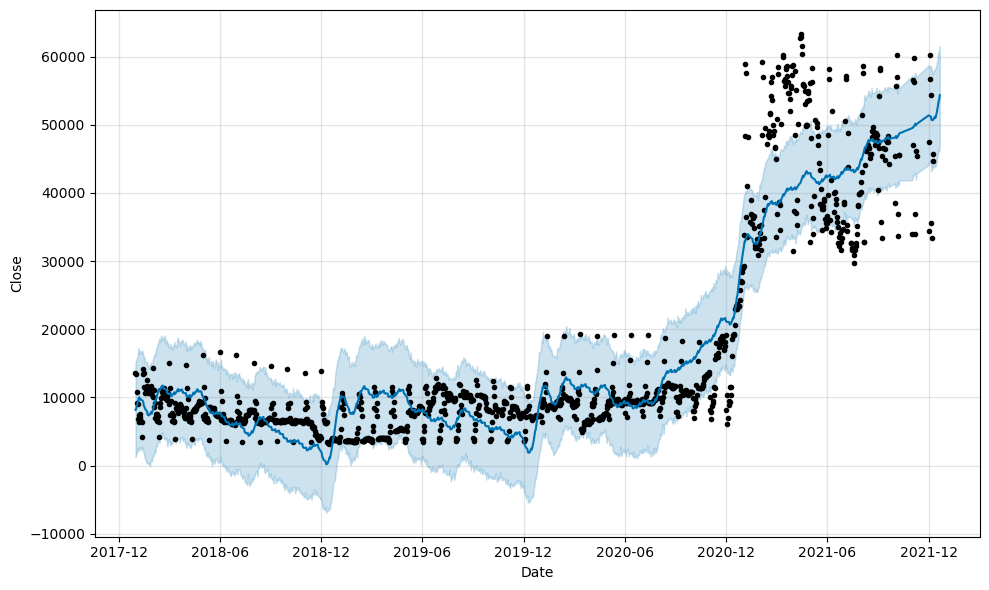

In [154]:
figure = m.plot(forecast1, xlabel='Date', ylabel='Close')

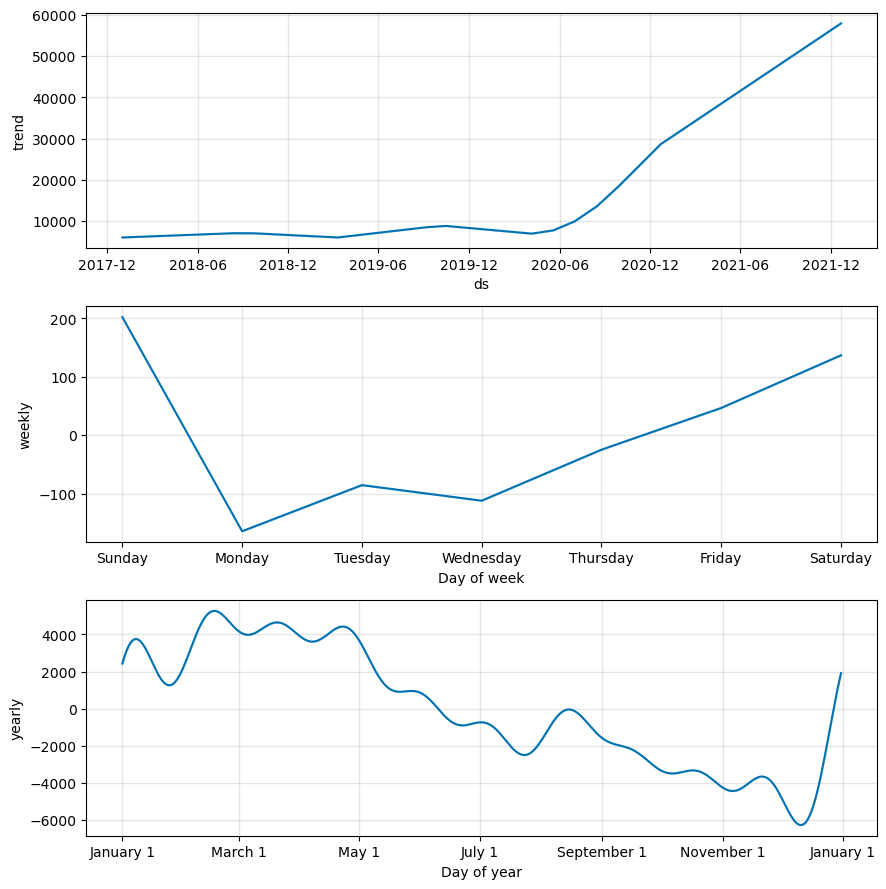

In [155]:
figure = m.plot_components(forecast1)

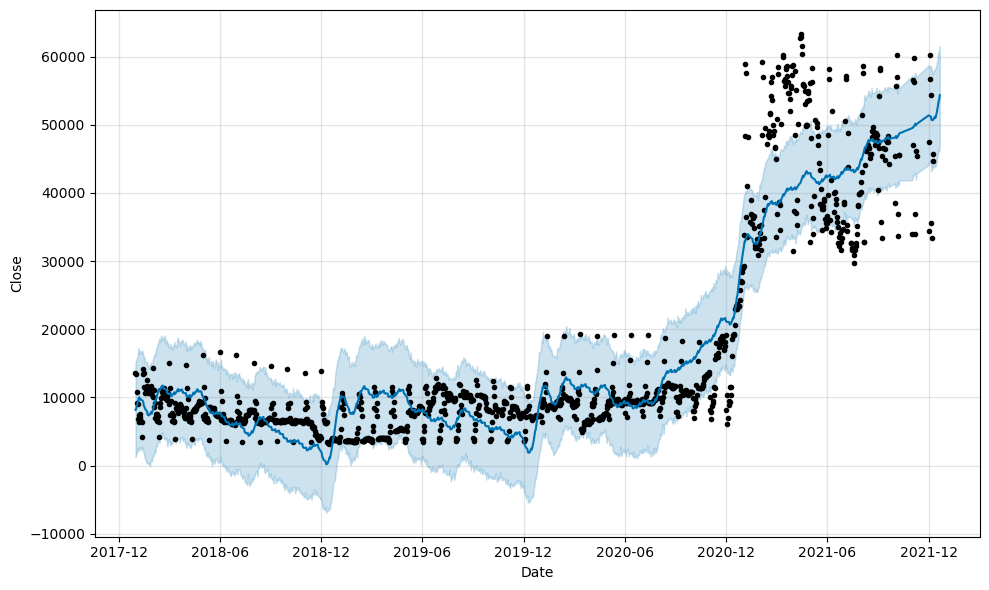

In [156]:
figure = m.plot(forecast1, xlabel='Date', ylabel='Close')

In [160]:
# bitcoin

In [221]:
train_data = simple_df[:-50]
test_data = simple_df[-50:]

In [222]:
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [223]:
forecast = model.predict(test_data[["ds"]])

In [224]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the evaluation metrics
mse = mean_squared_error(test_data['y'], forecast['yhat'][-100:])
mae = mean_absolute_error(test_data['y'], forecast['yhat'][-100:])
mape = mean_absolute_percentage_error(test_data['y'], forecast['yhat'][-100:])
rmse = np.sqrt(mse)
smape = np.mean(2.0 * np.abs(forecast['yhat'][-100:] - test_data['y']) / (np.abs(forecast['yhat'][-100:]) + np.abs(test_data['y'])))

# Print the evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("smape:",smape)

MSE: 129974702.93662077
MAE: 9094.816487369208
MAPE: 0.2254800272786834
smape: nan


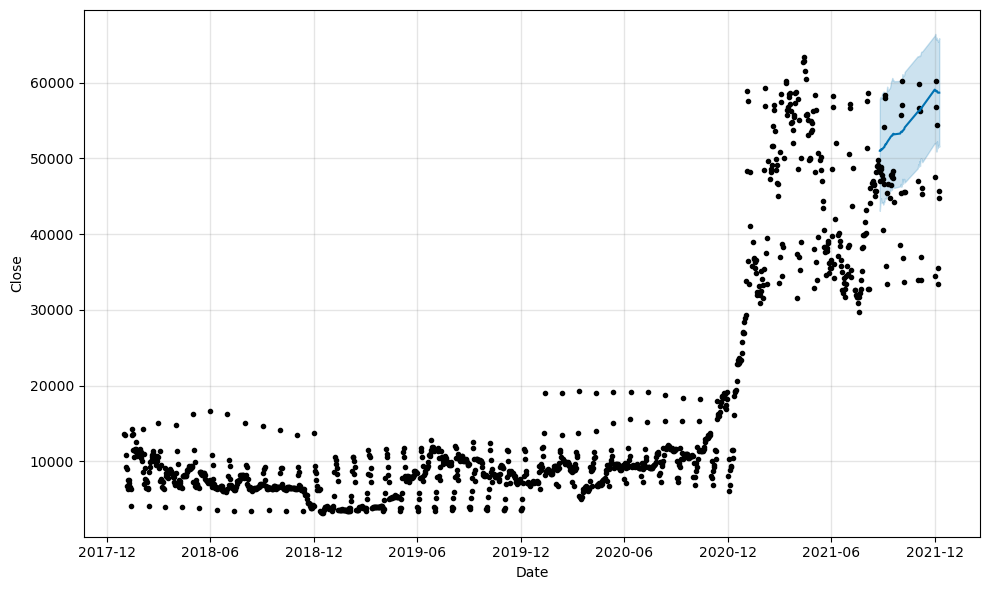

In [225]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close')


### Etherium

In [213]:
sample_df_1 = df_dict['df_5'][['date_', 'Close']]
sample_df_1.columns=['ds','y']

In [214]:
model = Prophet()
model.fit(sample_df_1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [215]:
future = model.make_future_dataframe(periods=365)
forcast = model.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-31,10.449610,6.721685,11.788007,10.449610,10.449610,-1.231625,-1.231625,-1.231625,0.057170,0.057170,0.057170,-1.288794,-1.288794,-1.288794,0.0,0.0,0.0,9.217985
1,2018-01-01,10.434774,6.857989,11.659817,10.434774,10.434774,-1.225563,-1.225563,-1.225563,0.038355,0.038355,0.038355,-1.263919,-1.263919,-1.263919,0.0,0.0,0.0,9.209211
2,2018-01-02,10.419939,6.736257,11.695927,10.419939,10.419939,-1.260322,-1.260322,-1.260322,-0.030636,-0.030636,-0.030636,-1.229686,-1.229686,-1.229686,0.0,0.0,0.0,9.159616
3,2018-01-03,10.405103,6.674287,11.711308,10.405103,10.405103,-1.284575,-1.284575,-1.284575,-0.098169,-0.098169,-0.098169,-1.186405,-1.186405,-1.186405,0.0,0.0,0.0,9.120529
4,2018-01-04,10.390268,6.824022,11.801579,10.390268,10.390268,-1.162294,-1.162294,-1.162294,-0.027739,-0.027739,-0.027739,-1.134555,-1.134555,-1.134555,0.0,0.0,0.0,9.227974


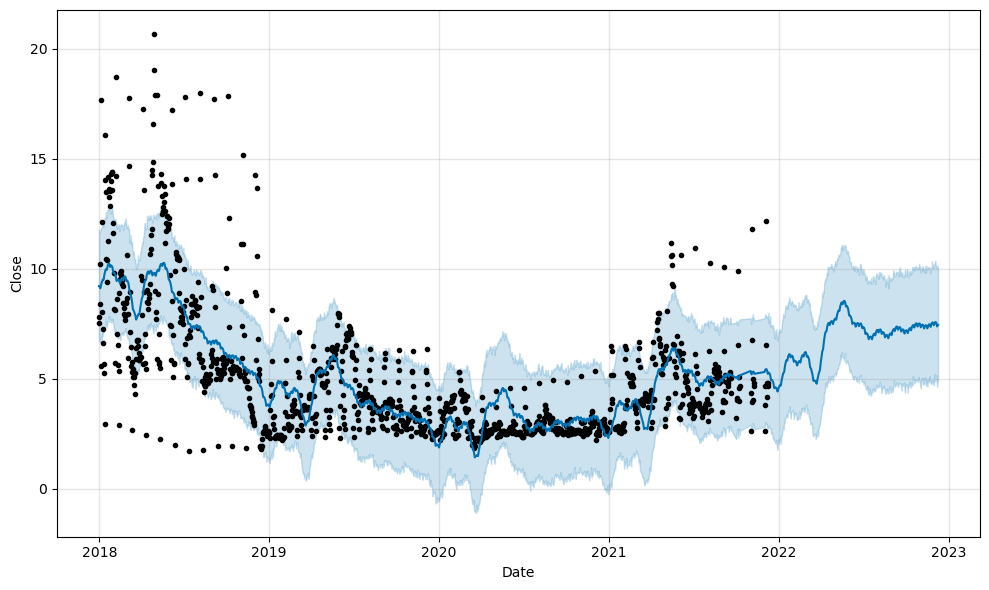

In [216]:
figure = model.plot(forcast, xlabel='Date', ylabel='Close')

In [191]:
train_data = sample_df_1[:-50]
test_data = sample_df_1[-50:]

In [192]:
model_1 = Prophet()
model_1.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
forecast = model_1.predict(test_data[["ds"]])

In [194]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate the evaluation metrics
mse = mean_squared_error(test_data['y'], forecast['yhat'][-100:])
mae = mean_absolute_error(test_data['y'], forecast['yhat'][-100:])
mape = mean_absolute_percentage_error(test_data['y'], forecast['yhat'][-100:])
rmse = np.sqrt(mse)
smape = np.mean(2.0 * np.abs(forecast['yhat'][-100:] - test_data['y']) / (np.abs(forecast['yhat'][-100:]) + np.abs(test_data['y'])))

# Print the evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
print("smape:",smape)

MSE: 3.666052836771796
MAE: 1.151116686674943
MAPE: 0.21328310108316337
smape: nan


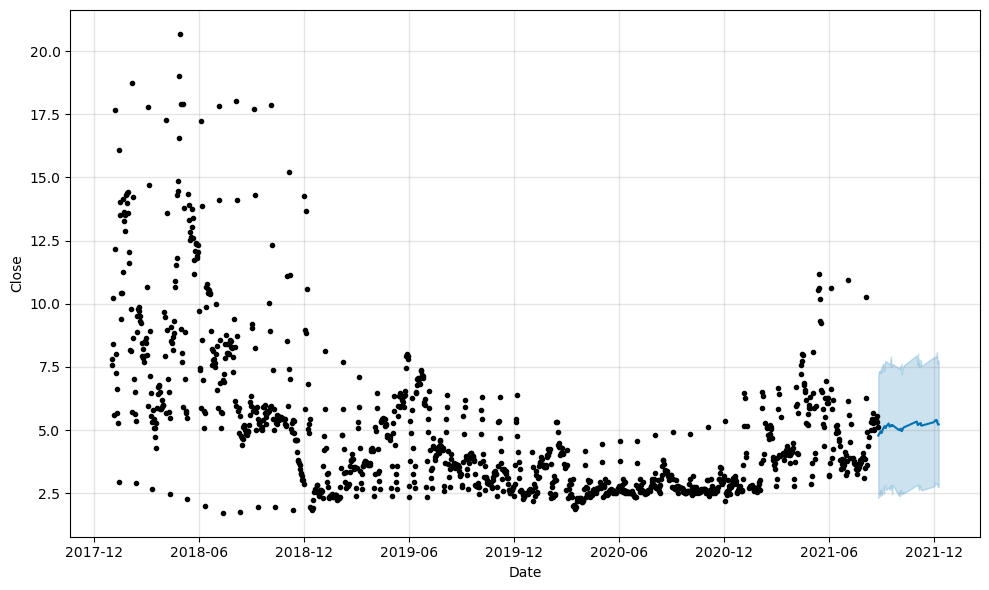

In [195]:
figure = model_1.plot(forecast, xlabel='Date', ylabel='Close')

### Litecoin

In [315]:
sample_df_2 = df_dict['df_6'][['date_', 'Close']]
sample_df_2.columns=['ds','y']

In [316]:
model = Prophet()
model.fit(sample_df_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [332]:
future3 = model.make_future_dataframe(periods=365)
forcast3 = model.predict(future)
forcast3[['ds','trend','yhat_lower','yhat_upper','yhat']].head()

,ds,trend,yhat_lower,yhat_upper,yhat
0,2017-12-31,635.394249,185.604309,1136.227888,641.159783
1,2018-01-01,634.362785,191.527490,1143.540606,647.492712
2,2018-01-02,633.331320,242.360365,1169.546076,682.323339
3,2018-01-03,632.299856,216.058889,1088.503886,661.954469
4,2018-01-04,631.268392,243.759074,1144.082959,687.427891


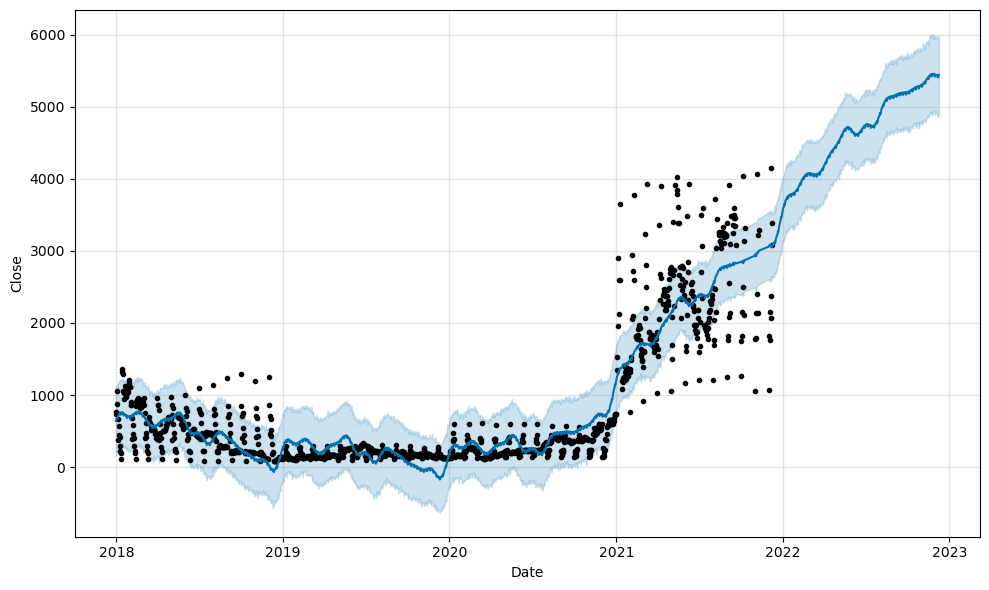

In [318]:
figure = model.plot(forcast3, xlabel='Date', ylabel='Close')

In [320]:
train_data = sample_df_2[:-50]
test_data = sample_df_2[-50:]

In [321]:
test_data.tail()

,ds,y
1435,2021-12-05,4150.433523
1436,2021-12-06,2376.936851
1437,2021-12-07,2074.252850
1438,2021-12-08,3084.562132
1439,2021-12-09,3380.140319


In [328]:
model_2 = Prophet()
model_2.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [329]:
forecast = model_2.predict(test_data[["ds"]])

In [330]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
45,2021-12-05,3781.771089,3210.485453,3969.098856,3738.819173,3827.848151,-192.417737,-192.417737,-192.417737,-5.755306,-5.755306,-5.755306,-186.662431,-186.662431,-186.662431,0.0,0.0,0.0,3589.353352
46,2021-12-06,3789.597017,3187.074307,4014.113382,3745.778318,3837.127811,-194.170903,-194.170903,-194.170903,-0.052427,-0.052427,-0.052427,-194.118475,-194.118475,-194.118475,0.0,0.0,0.0,3595.426114
47,2021-12-07,3797.422945,3223.379087,3999.348730,3753.125415,3845.853649,-194.062439,-194.062439,-194.062439,7.190046,7.190046,7.190046,-201.252485,-201.252485,-201.252485,0.0,0.0,0.0,3603.360506
48,2021-12-08,3805.248873,3176.479206,3985.762476,3760.275508,3854.389468,-217.811453,-217.811453,-217.811453,-9.914230,-9.914230,-9.914230,-207.897223,-207.897223,-207.897223,0.0,0.0,0.0,3587.437420
49,2021-12-09,3813.074801,3192.636090,4002.364596,3767.010933,3862.925288,-223.298280,-223.298280,-223.298280,-9.414211,-9.414211,-9.414211,-213.884069,-213.884069,-213.884069,0.0,0.0,0.0,3589.776521


In [331]:
# Calculate the evaluation metrics
mse = mean_squared_error(test_data['y'], forecast['yhat'])
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mape = mean_absolute_percentage_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
# smape = np.mean(2.0 * np.abs(forecast['yhat'][-50:] - test_data['y']) / (np.abs(forecast['yhat'][-50:]) + np.abs(test_data['y'])))

# Print the evaluation metrics
print("MSE:", mse)
print("MAE:", mae)
print("MAPE:", mape)
# print("smape:",smape)

MSE: 1138249.302428968
MAE: 839.7237951004342
MAPE: 0.45259909021547595


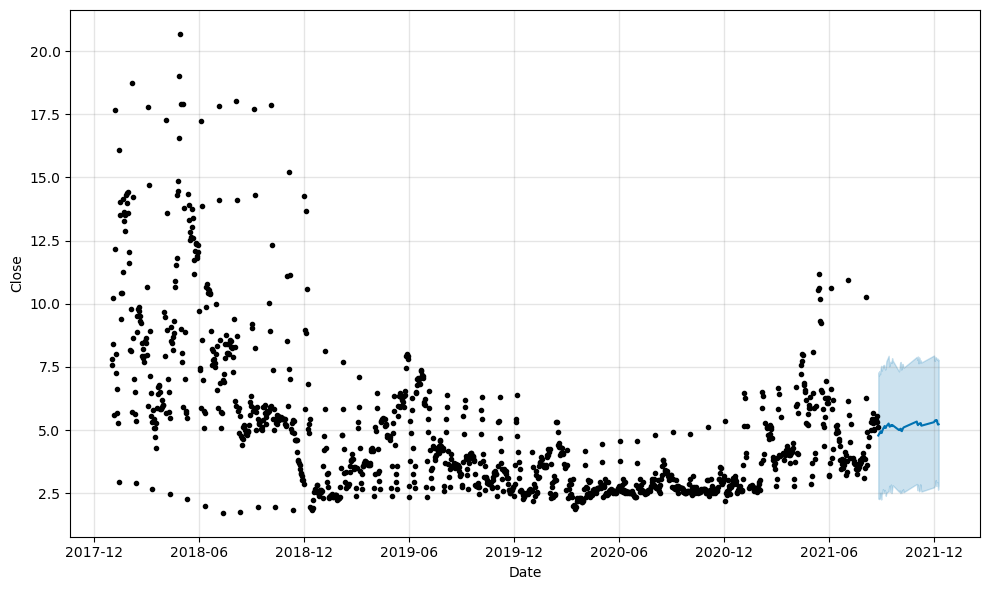

In [230]:
figure = model_1.plot(forecast, xlabel='Date', ylabel='Close')

In [240]:
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import math
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [259]:
df_dict['df_0'].shape

(1359, 11)

In [280]:
data=df_dict['df_0'][['date_','Open','Close']]
data.set_index('date_',inplace=True)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1359 entries, 2017-12-31 to 2021-12-09
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1359 non-null   float64
 1   Close   1359 non-null   float64
dtypes: float64(2)
memory usage: 31.9 KB


In [282]:
train_data=data[:-50]
test_data=data[-50:]

In [283]:
scaler=StandardScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [303]:
train_data_scaled.shape

(1309, 2)

In [272]:
train_data = train_data_scaled[['date_', 'Close']]
train_data.columns=['ds','y']
test_data = train_data_scaled[['date_', 'Close']]
test_data.columns=['ds','y']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [264]:
model_2 = Prophet()
model_2.fit(train_data_scaled)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.